In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("aod.csv")

df

,Year,age_of_death,Suicides
0,1981,10,0
1,1981,11,0
2,1981,12,2
3,1981,13,2
4,1981,14,1
...,...,...,...
2955,2017,85,18
2956,2017,86,23
2957,2017,87,14
2958,2017,88,17


#### Arithmetic Mean

1/N*∑i=1xi

Sum of all values divided by the total number of values.

In [2]:
df["age_of_death"].mean()

49.5

#### Median

The "middle value" of a dataset.

It separates the greater and lesser halves of the dataset.

In [3]:
df["age_of_death"].median()

49.5

Question: The dataset measures birthdays (i.e., no fraction of years), so why is the median 20.5?

In [4]:
df.shape
df.iloc[len(df)//2-1:len(df)//2+1]

,Year,age_of_death,Suicides
1479,1999,49,95
1480,1999,50,99




If a dataset contains an even number of values, there is no middle value. To compute a valid median the average of the two "middle values" is taken


In [6]:
#df.iloc[len(df)//2-1:len(df)//2+1]

#### Mode

The most common value in the dataset.

In [5]:
from collections import Counter
Counter(df["age_of_death"]).most_common(1)
df["age_of_death"].mode()

0     10
1     11
2     12
3     13
4     14
      ..
75    85
76    86
77    87
78    88
79    89
Length: 80, dtype: int64

#### Strength and weaknesses measures of central tendency

Mean: Takes all data points into account.
Can produce potentially misleading results, because it is affected by outliers.


Median:The median is not affected by outliers and should be favored when the data is widespread or contains outliers.


Mode:The mode is the - by far - least often used measure of central tendency.
It doesn't take into account multiple values, so in general, it has to be accompanied by other measures to paint the whole picture.

#### Visualization of measures of central tendency

Since in most cases, none of the above values will suffice to solely describe a dataset, you'll should jointly interpret them.
One easy way to do this (non-visually) in Pandas is by calling the .describe-method.

In [6]:
df["age_of_death"].describe()

count    2960.000000
mean       49.500000
std        23.096108
min        10.000000
25%        29.750000
50%        49.500000
75%        69.250000
max        89.000000
Name: age_of_death, dtype: float64

It gives you a valid overview of the central tendency of your data, albeit leaving out the mode.

Another way to describe the central tendency of your data visually is leveraging box-plots.

They summarize key measures into one standardized plot type.

To create box-plots, we'll use seaborn a plotting library specifically tailored to do statistical data visualization with Python and pandas.

#### Very brief introduction into seaborn

In essence, seaborn is a convenience wrapper around matplotlib to create plots of data gathered in pandas.dataframes.
Installation

pip|conda install seaborn

Import

import seaborn as sns
#It is also helpful to keep matplotlib around when working with seaborn
import matplotlib.pyplot as plt

Usage

Instead of offering tools to create plot yourself like matplotlib offers you a (wide) variety of prebuilt plot types out-of-the-box.

To get an overview of seaborn's capabilities look into their documentation.

In general any plot-type can be created by calling the respective function, and providing three types of arguments

sns.lineplot(x="x_column_name_in_dataframe", y="y_column_in_dataframe", data=df)

As we did with pandas we'll introduce seaborns features, along the way.

But, if we have a little bit of spare time, we'll also take a short peak behind the curtain of seaborn and look into some of its characteristics in detail :)

And now back to statistics: The box-plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:ylabel='age_of_death'>

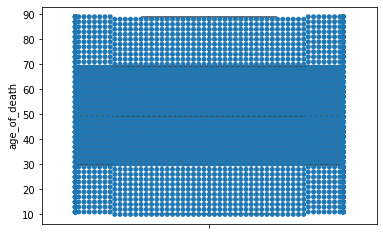

In [7]:
sns.boxplot(y="age_of_death", data=df)
sns.swarmplot(y="age_of_death", data=df)

#### Interpreting a boxplot.

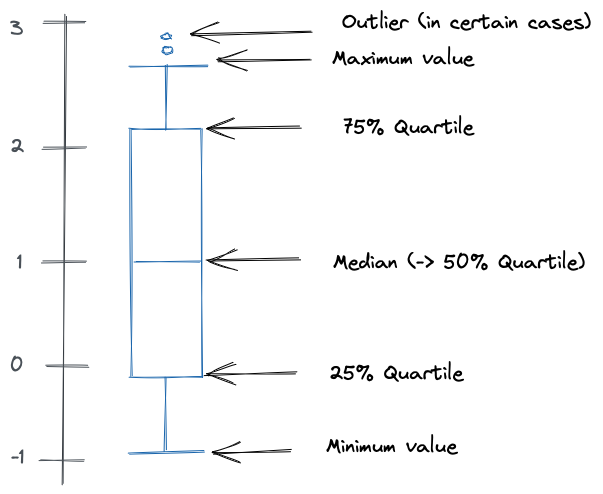

As you can see the horizontal lines indicate certain values within your dataset.

The 25%-Quartile is that value within your data that is greater than 25% of all your data points, (just like the median or 75%).

The box covers 50% of all your data points, its value range (the values where the box "starts" and "ends") shows the interquartile range (IQR).

The interquartile range is another useful measure to quantify the spread of data. It is defined by the difference of the 25%- and 75%-quartile and - in layman terms - shows the range in which 50% of your data lies.

If your data is very skewed and contains large outliers, the antennas would reach too far to indicate the real minimum- and maximum-values. In those cases dots are used to show the extreme outliers.

There are numerous methods, to classify which values are "extreme outliers".

Most commonly values that lie 1.5x IQR above or below the first or third quartile are defined as outliers.


<AxesSubplot:ylabel='tip'>

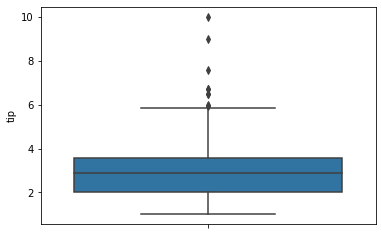

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")
tips
sns.boxplot(y="tip", data=tips)

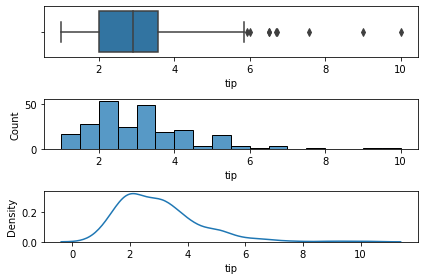

In [21]:
fig, axs = plt.subplots(3, 1)
sns.boxplot(x="tip", ax=axs[0], data=tips)
sns.histplot(x="tip", ax=axs[1], data=tips)
sns.kdeplot(x="tip", ax=axs[2], data=tips)
plt.tight_layout()

##### Variability

Measures of central tendencies show us where the majority of our data points are located.
Measure that account for variability tell us how far they are apart.

You can already get a glimpse of variability by looking at a boxplot!

But there are also standardized ways of measuring it numerically.

In general, variability tells us how much our measurements fluctuate and it might help us to understand how reliable our dataset can be used to make estimates about the population.

##### Measures of variability

By introducing box-plots we already learned about a measure of variability

##### Interquartile range

The interquartile range measures how 50% of the data is spread.

So while not painting the full picture it gives you a rough estimate of how your data is spread.

Standard deviation

The standard deviation measures the average amount of variability in your data. (Thereby taking into account all data points)

It simply measures the normalized sum of squared differences between each data point and the data's mean.
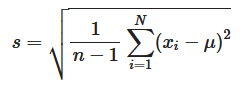

μ:= Arithmetic average of the data

N:= Number data points

Note:

While this formula bears some resemblance to the arithmetic average, there is one conceptual deviation.

Instead of normalizing the sum of deviations from the mean, by the number of samples, we normalize by N−1

.

The reason for that is that we typically estimate the standard deviation based on a sample.

Empirically, those estimates tend to be too low, so by decreasing the denominator, we "de-bias" or by enlarging it artificially.

If you compute the standard deviation on a population, you can drop this correction.

In [22]:
#df["age_of_death"].std(), df["age_of_death"].std(ddof=0) # ddf=0 computes the population std

##### Variance

The variance is conceptually strongly related to the standard deviation:
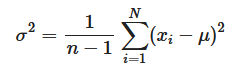

or even:
o²=s²

The only difference is that the square root is just dropped thereby making it harder to interpret since there is no clear correspondence to the actual values anymore.

But it is used in some statistical procedures and tests.

In [26]:
#df["age_of_death"].var(), df["age_of_death"].var(ddof=0), 

In [25]:
# By taking the square root of the variance, we obtain the standard deviation
#np.sqrt(df["age_of_death"].var())

##### Univariate data analysis: Skewness and Kurtosis
But first: Let's look at distributions

Before we look into skewness and kurtosis, we have to broaden our scope and look at distributions.

We already learned a way of displaying (certain stats) of a distribution graphically: The box-plot

But there are additional ways to display a distribution of values:


<AxesSubplot:xlabel='tip', ylabel='Count'>

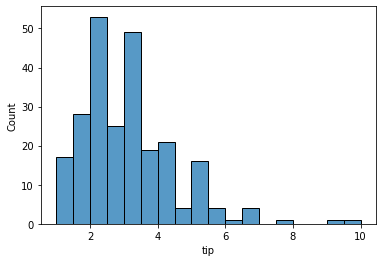

In [27]:
sns.histplot(x="tip", data=tips)

Histograms sort the single values of the dataset into bins that represent certain value ranges, and then count the number of measurements in each bin, and plot those counts as a barplot.

They are great to visualize distributions, but their quality highly depends, on the number of bins, which is a hyperparameter.

Depending on the number of bins, the result might produce missleading results:

<AxesSubplot:xlabel='tip', ylabel='Count'>

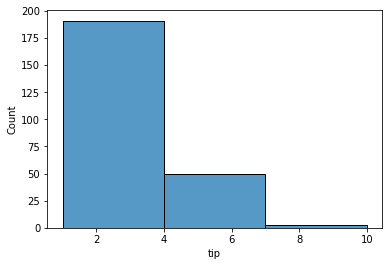

In [28]:
sns.histplot(x="tip", data=tips, bins=3)

In practice, though, you shouldn't worry about that too much, since most plotting libraries have robust routines to infer a suitable number of bins.

Nonetheless, histograms enable you to create a view of your data that might reveal interesting insights that boxplots can't deliver.

To highlight this let's create some data artificially using a Gaussian (or normal distribution).

The Gaussian distribution is the most widely used type of distribution since many phenomena are normally distributed.

For example, the height of humans follows a normal distribution.

In general, the normal distribution can be used to describe phenomena where most of the population is close to the mean, and the probability of encountering samples that deviate from the mean decreases exponentially with the amount of deviation.

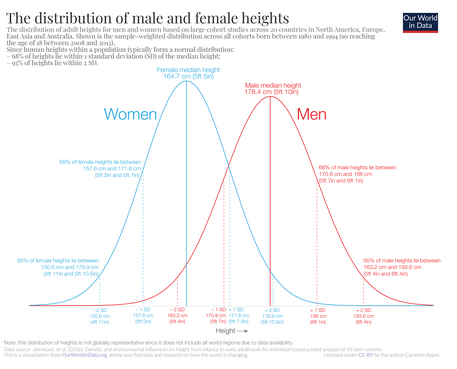

<AxesSubplot:xlabel='idc', ylabel='pdf'>

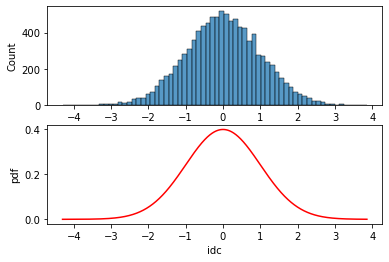

In [31]:
from scipy.stats import norm
import numpy as np
import pandas as pd

# Create a normal distribution
dist = norm(scale=1.0, loc=0.0)

# Randomly sample values from the distribution
random_values = dist.rvs(size=10_000)

# Create data to visualize the probability density function (pdf)
idc = np.linspace(random_values.min(), random_values.max(), 10_000)
pdf = norm.pdf(idc)
generated_dataset = pd.DataFrame({"rand": random_values, "idc": idc, "pdf": pdf})

# Plot random values and the pdf
fig, axs = plt.subplots(2, 1)
sns.histplot(x="rand", ax=axs[0], data=generated_dataset)
sns.lineplot(x="idc", y="pdf", color="red", data=generated_dataset)

Here we sampled some random values from an artificial Gaussian distribution, and also computed the probability density function of the distribution.

This function gives us the probability of drawing a value if randomly sample from the distribution (=> the area under the curve adds up to 1).

If we compare this curve with the histogram, we see that bins in regions of high probability density contain more values than those in lower-density regions.

So, histograms can reveal a discrete approximation of the shape of the distribution of the data (not only for Gaussian distributions!).

Knowing about the shape of the distribution is important to pick the right tools, so it is an essential step in exploratory data analysis.

seaborn even comes with a plotting function that tries to infer the continuous shape of the underlying distribution:

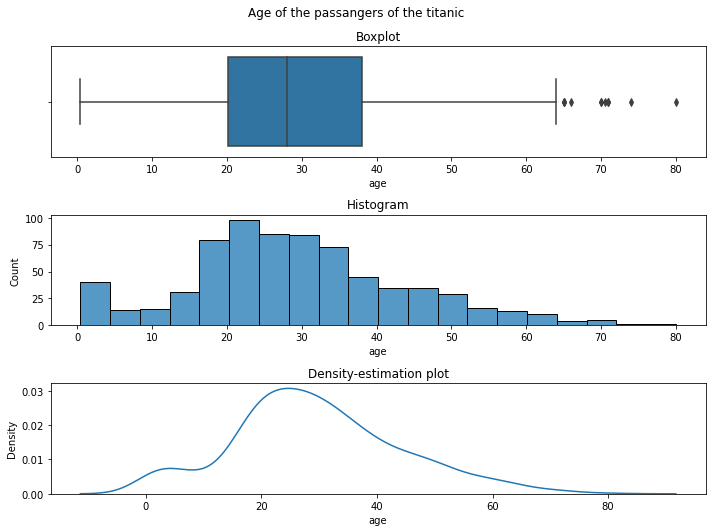

In [32]:
fig, axs = plt.subplots(3, 1, figsize=(10, 7.5))
titanic = sns.load_dataset("titanic")

fig.suptitle("Age of the passangers of the titanic")
sns.boxplot(x="age", ax=axs[0], data=titanic)
axs[0].set_title("Boxplot")
sns.histplot(x="age", ax=axs[1], data=titanic)
axs[1].set_title("Histogram")
sns.kdeplot(x="age", ax=axs[2], data=titanic)
axs[2].set_title("Density-estimation plot")
plt.tight_layout()

As you can see here, all these three plots offer a slightly different perspective on the data.

And, also we can see that the amount of tips in the tips dataset seems to follow a sort of Gaussian distribution, but deviates from the "ideal" form in some ways:

- It is not symmetric, which makes sense since age can't take on negative values.
- The width of the distribution seems to be very wide, indicating a large spread of values.

To quantify those properties, we can compute skewness and kurtosis.

#### Skewness

Skewness measures the asymmetry of a probability distribution.

Skewness can be divided into three types:

    Positive => Tail is on the right
    Negative => Tail is to the left
    Zero => Distribution is symmetric => Tails at both sides are roughly equally long.

There is more than one way to compute skewness, normally the Fishers-Pearsons correlation coefficient is used:

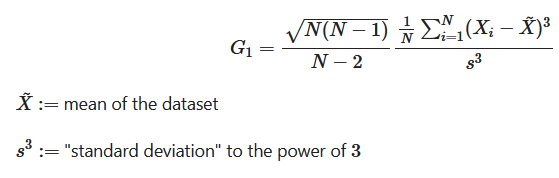

Let's compute the skewness of the age of the titanic's passengers:

In [33]:
titanic["age"].skew()

0.38910778230082704

The value is positive correctly indicating that the tail to the right is longer than on the other side.

#### Kurtosis

Kurtosis describes the "tailedness" or "peakedness" of a distribution.

A distribution with a low value of kurtosis looks more flattened, meaning that it accumulates a lot of its probability mass in the tails, and its peak is more rounded.

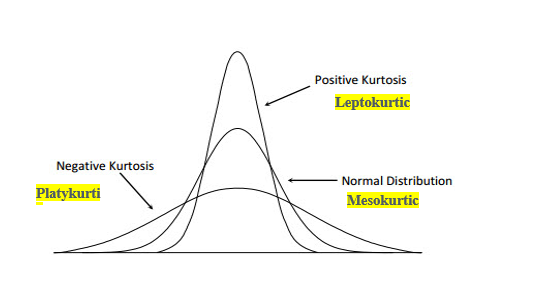
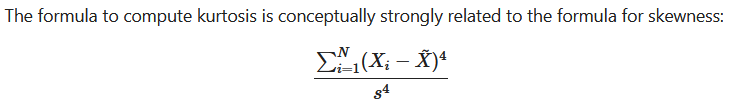

Again, let's compute the kurtosis for the age of the passengers:

<AxesSubplot:>

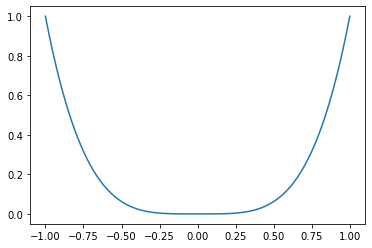

In [35]:
x = np.linspace(-1, 1, 1000)
y2 = x**2
y3 = x**3
y4 = x**4

plot_df = pd.DataFrame({"x": x, "y2": y2, "y3": y3, "y4": y4})
sns.lineplot(x=x, y=y4)

#### Excess Kurtosis

In contrast, to skewness which is informative by itself, interpreting kurtosis can be more challenging.

To ground kurtosis values they can be compared against the standard normal distribution, as a point of reference.

To do this you simple subtract the actual kurtosis value by three:
Excess Kurtosis=Kurtosis−3

If the Excess kurtosis is:

- positive, then the distribution is more narrowly tailored than a normal distribution.
- negative, then the distribution is flatter than a normal distribution.


#### Bi- and multivariate data analysis

While univariate measurements give you information about a single variable, more often you'll want to explore potential relationships between multiple variables.

This type of analysis is called bivariate analysis if you'll investigate two variables at once, or multivariate if you search for relationships within more than two variables.

If you follow the standard procedure of exploratory data analysis, then you would first analyze each variable on its own, and then proceed to investigate possible relationships between them.


#### Covariance

The most basic way to check if two variables are potentially related is to ask whether a value change of one variable, implies that the other variable changes too.

This relationship in change can come in two flavors: If one value increases the other one might either also increase, or decrease.

If one variable changes while the other one doesn't then there is possibly no relation at all.

Covariance is a simple way to measure those monotone relations:
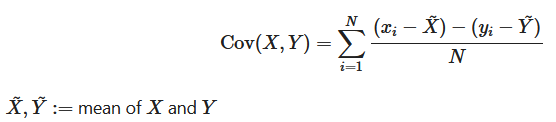

To see covariance in action let's generate some artificial data:

In [36]:
x = np.linspace(0, 1, 500)
y = -x
w = (np.random.randn(500)*.15) + x
u = np.tanh(np.sin(x**20))
z = np.random.rand(500)
o = np.linspace(3, 4, 500)

cov_df = pd.DataFrame(dict(x=x, y=y, w=w,u=u, z=z, o=o))

Covariance can also, often be observed visually.

A great way to compare each pair variables in a dataset against each other is seaborn's pairplot:

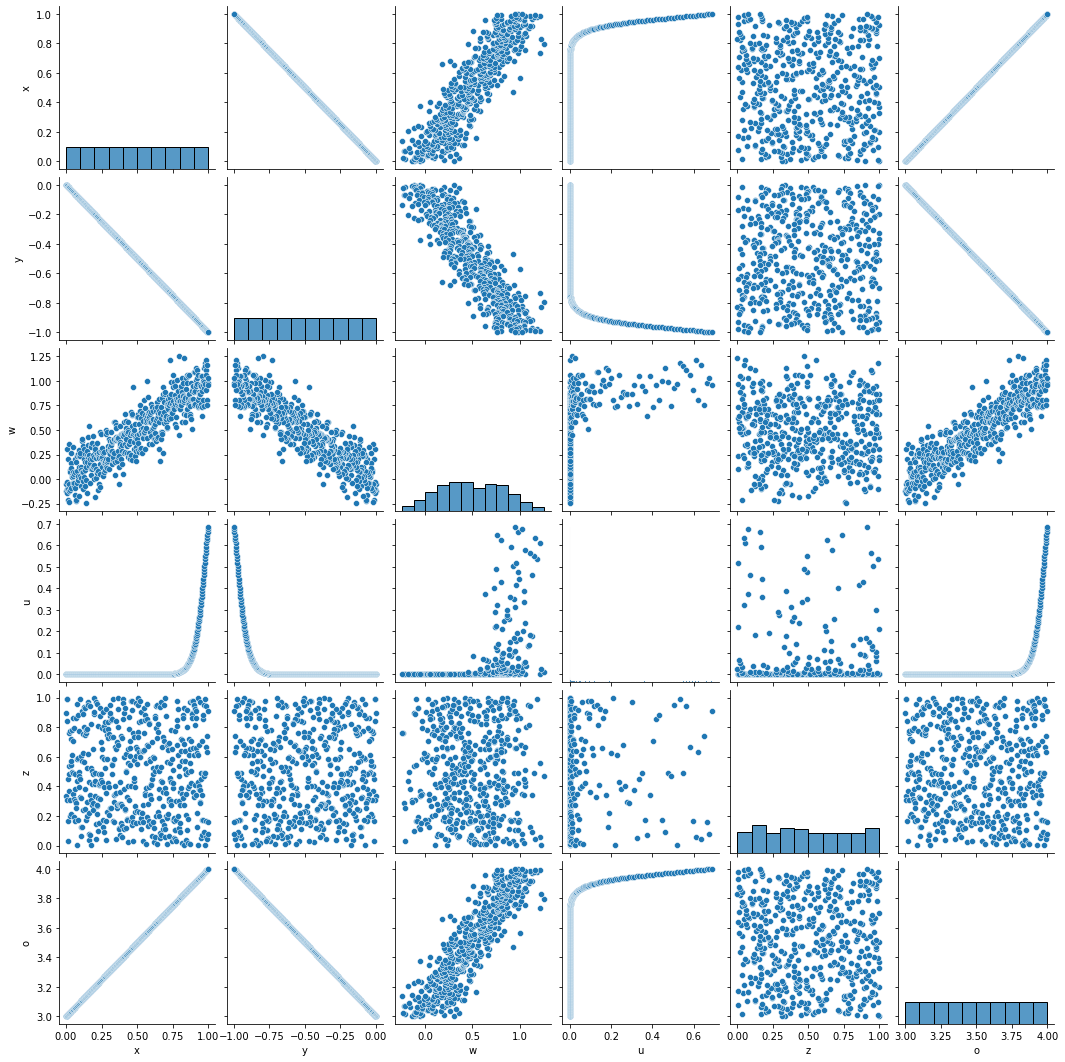

In [37]:
sns.pairplot(data=cov_df)

It's visible that there is mostly a clear relationship between those variables (except z).

Now let's compute the covariance matrix between all variables:

<AxesSubplot:>

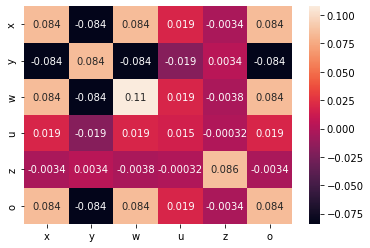

In [38]:
cov_mat = cov_df.cov()
sns.heatmap(data=cov_mat, annot=True)

By looking at the matrix we can see, that "our assumption" holds true for variables x,w,y and z.

Interestingly, although there is a clear relationship between u
and x,w,y the covariance is close to 0

for those pairs.

This is because covariance is only suitable to measure linear relationships (e.g., for any amount that x
varies, y varies for the same amount times a fixed factor)

#### Correlation

If you look at the covariance map from above, you can see that the amount of covariance between the features varies quite a lot.

Especially, if you look along the diagonal axis, describing the covariance of each feature with itself you see that while each pair has maximum covariance, the actual value is determined by the magnitude of the features, making comparison hard at times.

To alleviate this issue, you can use an alternative (some might say extended) measure to describe the relation between two variables: Correlation

There are many ways to measure correlation, the most commonly used measure is the Pearson Correlation Coefficient:
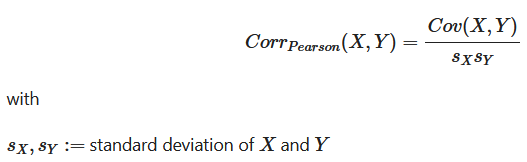

Strictly speaking, the Pearson Correlation Coefficient is the standardized form the covariance, therefore inheriting most of the properties of the Covariance, like only being able to account for linear types of correlations.

Let's compute the correlation with Pandas:

<AxesSubplot:>

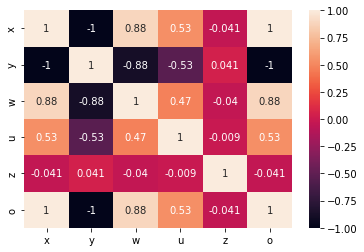

In [39]:
corr_mat = cov_df.corr(method="pearson")
sns.heatmap(data=corr_mat, annot=True)

A first glance at the diagonal of the correlation matrix reveals, that the correlation is bound to a value of 1.

By looking a the correlation coefficients for x
and y

, we also observe that the correlation values can that correlation can take on negative values if the linear relationship between two variables is negative.

Note:

As you can see, in the code above, we explicitly told pandas to compute the pearson correlation for a data. This is because the .corr-method suports also supports to compute two types of rank correlation coefficients (spearman and kendall).

These measures do not compare actual values changes within your data, but rather sort the data and then analyze how the ranks of each data point in the sorted list are correlated.

Nonetheless, by default, pandas computes the pearson correlation, so stating it isn't strictly necessary.

#### Correlation vs. causation

As we've all learned through popular media during the pandemic, just because two variables correlate it doesn't mean that you can safely assume there is a direct causal reason for that.

Strictly, speaking correlation is a necessary but not sufficient cause for causation!

Consider this example taken from Richard McElreath's book "Statistical Rethinking".

It shows the divorce rate in all US states and the number of waffles houses in those states:


In [41]:
waffles = pd.read_csv("WaffleDivorce.csv", sep=";")
waffles.head()

,Location,Loc,Population,MedianAgeMarriage,Marriage,Marriage SE,Divorce,Divorce SE,WaffleHouses,South,Slaves1860,Population1860,PropSlaves1860
0,Alabama,AL,4.78,25.3,20.2,1.27,12.7,0.79,128,1,435080,964201,0.45
1,Alaska,AK,0.71,25.2,26.0,2.93,12.5,2.05,0,0,0,0,0.00
2,Arizona,AZ,6.33,25.8,20.3,0.98,10.8,0.74,18,0,0,0,0.00
3,Arkansas,AR,2.92,24.3,26.4,1.70,13.5,1.22,41,1,111115,435450,0.26
4,California,CA,37.25,26.8,19.1,0.39,8.0,0.24,0,0,0,379994,0.00


<AxesSubplot:xlabel='WaffleHouses', ylabel='Divorce'>

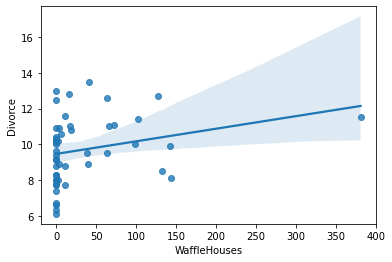

In [42]:
sns.regplot(x="WaffleHouses", y="Divorce", data=waffles)

<AxesSubplot:>

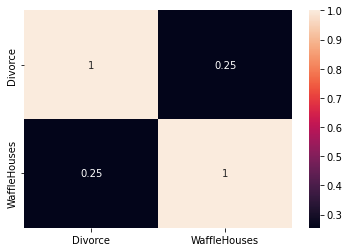

In [43]:
sns.heatmap(data=waffles[["Divorce", "WaffleHouses"]].corr(), annot=True)

While a Pearson correlation 0.25

is no sign for a strong correlation, this value suggests a least a weak correlation.

But, obviously, there is no good direct explanation that can account for this weird relationship.

A more intriguing cause can be found, by looking at some the median age of marriage:

<AxesSubplot:xlabel='MedianAgeMarriage', ylabel='Divorce'>

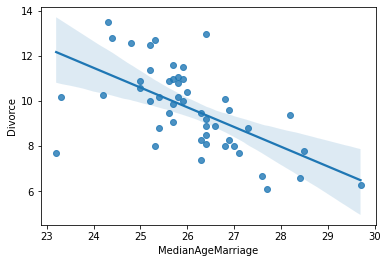

In [44]:
sns.regplot(x="MedianAgeMarriage", y="Divorce", data=waffles)

<AxesSubplot:>

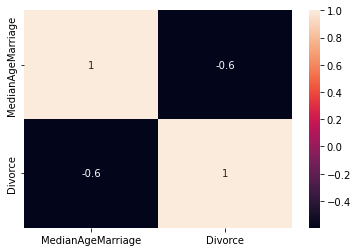

In [45]:
sns.heatmap(data=waffles[["MedianAgeMarriage", "Divorce"]].corr(), annot=True)

Not only do these values correlate much stronger, they also offer a better explanation for the divorce rate and can shed light on the weird waffle house riddle.

If we look at the states and their number median age of marriage:


In [46]:
waffles.sort_values(by="MedianAgeMarriage")[["Location", "MedianAgeMarriage"]].head(10)

,Location,MedianAgeMarriage
12,Idaho,23.2
43,Utah,23.3
49,Wyoming,24.2
3,Arkansas,24.3
35,Oklahoma,24.4
17,Kentucky,24.8
47,West Virginia,25.0
16,Kansas,25.0
1,Alaska,25.2
42,Texas,25.2


We see that people in the more rural southern states tend to get married at young ages.

Without further data, it would be speculation what drives them to get married so early. (Possibly more conservative religious beliefs and values...)

But it's safe to assume that marriages of older people who might have spent some time in a relationship before are generally more stable.

Furthermore, to explain the correlation of divorce of WaffleHouse we have to know that the WaffleHouse brand originated in Georgia and is predominantly common in the south of the US.

So the correlation, between the divorce rate and the number of WaffleHouses per state is just a coincidence driven by external factors (that our data does not completely reflect).

So stay aware of spurious correlations and always be critical of your findings!